# **Colab 用户注意**

# **请勿直接在此文件中编辑——你的修改可能会丢失！**

# **开始前一定要先复制一份。**

如何复制文件

1. 点击左上角的“File”。
> *如果找不到顶部菜单（比如“File”或“Runtime”），点击右上角的“v”标志来显示它们。*

2. 选择“Save a copy in Drive”

3. 把复制的文件名改成“YOURNAMEs_FileName.ipynb”。
> 例：如果你叫 Olivia，就命名为 Olivias_FileName.ipynb



---

* 复选标记（✅）不会被保存。如果用 Chrome 的刷新按钮重新加载页面，标记会消失。<br>
如果想暂停，稍后继续，可以插入一个文本单元，写上“SO FAR DONE”之类的文字。

---

* 在 Colab 中，**之前的输出会每 30 到 90 分钟重置一次**。<br>
  因此，经常会遇到类似 `~~ is not defined` 的错误。

  🔁 遇到 `~~ is not defined` 错误时该怎么办
  1. 首先确认变量拼写是否正确。<br>
  2. 拼写没错但仍报错，**点击你想重启的代码单元**。<br>
  3. 点击左上角的“Runtime” → 选择“Run before”。<br>
    → 这样会**重新运行该单元之前的所有代码单元**。
  4. 再次运行该单元。

  若完成上述步骤仍然报错，<br>
  可能是之前某些 TODO 答案填错了。<br>
  请确认答案正确，或者向 ChatGPT 或其他编程助手求助。

# **Preparation**

本节仅加载之前章节的内容。<br>
直接运行代码即可，无需阅读。<br>
你也可以直接跳过。<br>

In [ ]:
# 下载文件
!wget https://raw.githubusercontent.com/HayatoHongo/Everyones_nanoGPT/main/input.txt -O input.txt
# 加载刚刚以 utf-8 编码下载的名为 input.text 的文件。
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text = f.read()

# 一个用于美观显示张量的函数（可跳过）
import torch
import torch.nn as nn
import torch.nn.functional as F

def print_formatted_tensor(*args, width=6, decimals=2):
    """
    将英文注释、文档字符串和 print 语句翻译成简体中文。    A function that neatly formats and displays a PyTorch Tensor, and also prints its size.

    Example usage:
        print_formatted_tensor("名称", tensor)
        print_formatted_tensor(tensor)

    Args:
        *args: If given 1 argument, it is treated as a tensor.
               If given 2 arguments, the first is treated as the name, the second as the tensor.
        width (int): Display width for each number (default: 6)
        decimals (int): Number of decimal places to show (default: 2)
    """
    将英文注释、文档字符串和 print 语句简洁、友好、自然地翻译成简体中文。
    # 从参数中确定张量和名称
    if not args:
        raise ValueError("At least one argument is required.")
    if isinstance(args[0], str):
        if len(args) < 2:
            raise ValueError("Tensor is not specified.")
        name, tensor = args[0], args[1]
    else:
        name, tensor = None, args[0]

    # 将张量转换为列表
    tensor_list = tensor.detach().cpu().tolist()

    def format_list(lst, indent):
        """格式化递归嵌套列表并返回字符串"""
        # 如果内容是列表，则重新返回
        if isinstance(lst, list) and lst and isinstance(lst[0], list):
            inner = ",\n".join(" " * indent + format_list(sub, indent + 2) for sub in lst)
            return "[\n" + inner + "\n" + " " * (indent - 2) + "]"
        # 用于数字列表
        return "[" + ", ".join(f"{v:{width}.{decimals}f}" for v in lst) + "]"

    # 格式化字符串（最外层框架的方括号已移除）
    formatted = format_list(tensor_list, indent=9)
    inner_formatted = formatted[1:-1].strip()

    # 结果输出
    if name:
        print(name)
    print(f"Tensor Size: {list(tensor.size())}")
    print("张量([")
    print("" * 9 + inner_formatted)
    print("" * 7 + "])")

# **Chapter 12 Trainer Class**

### **Section 1: Class Definition**

🔘 **Options**：可能有你用不到的额外选项。

`self.model`　`self.optimizer`　`self.data_loader`　`self.config`　`split_data`　`get_batch`　`'train'`, `'val'`　`input_batch`　`target_batch`　`logits`　`self.config.total_training_steps`　`self.config.evaluation_loops`  
`loss`　`backward()`　`self.train_step()`　`self.evaluate()`

In [ ]:
class Trainer:
    def __init__(self, model, optimizer, data_loader, config):
        self.model = model
        self.optimizer = optimizer
        self.data_loader = data_loader
        self.config = config

    def train_step(self):
        # 获取一批训练数据。
        input_batch, target_batch = ___________._______(_____)
        self.optimizer.zero_grad()

        # 模型前向传播和损失计算
        logits, loss = _______(_________, __________)
        _____.__________  # 反向传播（误差反向传播）
        self.optimizer.step()  # 更新参数

        return loss.item() # 返回损失的值

    def evaluate(self):
        self.model.eval()  # 设置为评估模式
        losses = {"train": [], "val": []} # 计算训练和验证数据的损失
        with torch.no_grad():
            for split in ['train', 'val']:
                for _ in range(self.config.evaluation_loops):
                    input_batch, target_batch = self.data_loader.get_batch(split)
                    _, loss = self.model(input_batch, target_batch)
                    losses[split].append(loss.item())
        self.model.train()  # 返回训练模式

        # 计算每个划分（训练集、验证集）的平均损失
        return {split: sum(values) / len(values) for split, values in losses.items()}

    def train(self):
        # 根据配置中指定的次数运行 train_step。
        for step in range(_________________________):

            # 每100次迭代评估一次，或仅在最后一步评估。
            if step % self.config.evaluation_frequency == 0 or step == self.config.total_training_steps - 1:
                eval_loss = self.evaluate()
                print(f"Step {step}: Train Loss {eval_loss['train']:.4f}, Validation Loss {eval_loss['val']:.4f}")

            # 训练的一步（你每次执行的主要过程）
            train_loss = _____________
            # 无返回值

<details>
<summary>点击这里显示/隐藏答案</summary>

```python
class Trainer:
    def __init__(self, model, optimizer, data_loader, config):
        self.model = model
        self.optimizer = optimizer
        self.data_loader = data_loader
        self.config = config

    def train_step(self):
        # 获取一个训练批次
        input_batch, target_batch = self.data_loader.get_batch('train')
        self.optimizer.zero_grad()

        # 模型前向计算和损失计算
        logits, loss = self.model(input_batch, target_batch)
        loss.backward()  # 反向传播（误差反传）
        self.optimizer.step()  # 更新参数

        return loss.item()  # 返回损失值

    def evaluate(self):
        self.model.eval()  # 切换到评估模式
        losses = {"train": [], "val": []}  # 对训练和验证两部分计算损失
        with torch.no_grad():
            for split in ['train', 'val']:
                for _ in range(self.config.evaluation_loops):
                    input_batch, target_batch = self.data_loader.get_batch(split)
                    _, loss = self.model(input_batch, target_batch)
                    losses[split].append(loss.item())
        self.model.train()  # 切回训练模式

        # 计算每个数据集的平均损失（训练集和验证集）
        return {split: sum(values) / len(values) for split, values in losses.items()}

    def train(self):
        # 运行train_step，次数根据config设定
        for step in range(self.config.total_training_steps):

            # 每100步或者最后一步进行一次评估
            if step % self.config.evaluation_frequency == 0 or step == self.config.total_training_steps - 1:
                eval_loss = self.evaluate()
                print(f"Step {step}: Train Loss {eval_loss['train']:.4f}, Validation Loss {eval_loss['val']:.4f}")

            # 进行一步训练（每次的主要操作）
            train_loss = self.train_step()
```

**Chapter 11: Trainer Class: Section 1: Class Definition** <label><input type="checkbox"> Mark as Done</label>

### **Section 2: Class Summary**

将第1章到第11章的所有类粘贴过来。<br>
**将 DeterministicDropout 替换为 nn.Dropout。**

[Watch the video!](https://youtu.be/j2ErzvlslKA)
- 无音频
- 4分钟

视频中，文件名是 answer_colab，但无需介意。

```python
AttentionHead: dropout = nn.Dropout(config.dropout_rate)
MultiHeadAttention: dropout = nn.Dropout(config.dropout_rate)
FeedForward:  nn.Dropout(config.dropout_rate)
```

**用 nn.Dropout 替换 DeterministicDropout**
```python
AttentionHead: dropout = nn.Dropout(config.dropout_rate)
MultiHeadAttention: dropout = nn.Dropout(config.dropout_rate)
FeedForward:  nn.Dropout(config.dropout_rate)
```
<label><input type="checkbox"> Done</label>

**Chapter 12: Trainer Class: Section 2: Class Summary** <label><input type="checkbox"> 标记为完成</label>

### **Section 3: Training and Inference**

到目前为止，embedding 维度是8，注意力头数是2，FeedForward 网络的隐藏层维度是16。<br>
这对于良好的表达来说太有限了。<br>
现在，将 embedding 维度设置为64，注意力头数为4，FeedForward 网络的隐藏层维度是256。

In [ ]:
# 存储模型设置的配置类
class ModelConfig:
    batch_size = 16  # 一次处理的数据量（批量大小）
    input_sequence_length = 32  # 输入数据长度（序列长度）
    total_training_steps = 5000  # 最大训练次数（步数）
    evaluation_frequency = 100  # 模型性能评估频率
    learning_rate = 0.001  # 学习率
    device_type = 'cuda' if torch.cuda.is_available() else 'cpu'  # 使用设备（GPU 或 CPU）
    evaluation_loops = 10  # 评估期间的重复次数
    embedding_dim = 64  # 嵌入层大小（特征向量的维度数）
    hidden_dim = 256
    num_attention_heads = 4  # 注意机制头数
    layer_count = 4  # 模型中的层数
    dropout_rate = 0.1  # 丢弃概率
    random_seed_value = 1337  # 用于随机数种子以保证结果可复现

# 验证您的设置
config = ModelConfig()

print("ModelConfig 类的每个设置：")
print(f"Batch size: {config.batch_size}")
print(f"Input sequence length: {config.input_sequence_length}")
print(f"Total training steps: {config.total_training_steps}")
print(f"Evaluation frequency (in steps): {config.evaluation_frequency}")
print(f"Learning rate: {config.learning_rate}")
print(f"Device in use: {config.device_type}")
print(f"Number of evaluation loops: {config.evaluation_loops}")
print(f"Embedding vector dimension: {config.embedding_dim}")
print(f"Hidden layer dimension of the feedforward network: {config.hidden_dim}")
print(f"Number of attention heads: {config.num_attention_heads}")
print(f"Number of model layers: {config.layer_count}")
print(f"Dropout rate: {config.dropout_rate}")
print(f"Random seed value: {config.random_seed_value}")

**`Check Point`**  
<label><input type="checkbox"> 确认 Config 类中的每个设置都显示正确<br></label>  
- 批量大小：16<br>  
- 块大小：32<br>  
- 最大迭代次数：5000<br>  
- 评估间隔：100<br>  
- 学习率：0.001<br>  
- 使用设备：cuda 或 cpu<br>  
- 评估迭代次数：10<br>  
- 嵌入层维度：64<br>  
- 前馈隐藏层维度：256<br>  
- 注意力头数：4<br>  
- 模型层数：4<br>  
- Dropout 率：0.1<br>  
- 随机种子：1337<br>

In [ ]:
# 加载配置并设置随机种子
config = ModelConfig()
torch.manual_seed(config.random_seed_value)  # 设置随机数种子以确保结果可复现

In [ ]:
# 加载数据
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text_data = f.read()
data_loader = DataLoader(text_data, config)

In [ ]:
# 初始化模型和优化器
model = BigramLanguageModel(vocab_size = data_loader.vocab_size, config = config).to(config.device_type)  # 指定你使用的设备
optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate)

# 打印模型中的参数数量
print(sum(p.numel() for p in model.parameters())/1e6, 'M parameters')

相比之下，GPT2-Small 模型有 1.17 亿（或 1.24 亿）参数。

作为测试，尝试在预训练阶段进行生成。

In [ ]:
text = "Let's he"  # 提示
initial_context = torch.tensor(data_loader.encode(text), dtype=torch.long)
# 使用 unsqueeze(0) 添加批量维度（批量大小=1）
initial_context_unsqueeze = initial_context.unsqueeze(0)
# 关键是要将其移动到你正在使用的设备（CPU或GPU）！
initial_context_unsqueeze = initial_context_unsqueeze.to(config.device_type)

# 开始生成
generated_sequence_initial = model.generate(initial_context_unsqueeze, max_new_tokens=500)
print(data_loader.decode(generated_sequence_initial[0].tolist()))

嗯，这是台电脑💻，是吧？

那好，咱们训练它，把它养成宝宝👶吧！

**终于到了最后一部分。开始播放 [emotional BGM¹](https://youtu.be/GqmAe0QfkjU?feature=shared)。<br>训练大约需要2到4分钟。让我们静静感受这一刻。**

---

内容来源：  
¹ **DooPiano**，“BTS (방탄소년단) – 봄날 (Spring Day) 钢琴与弦乐团版本”，YouTube，3:41，发表于约8.2年前（大约2017年）。访问时间2025年7月8日。

---

**请务必听下背景音乐！保证让你感动！现在，运行下面的单元开始训练吧！**

In [ ]:
print("===训练成功开始===")

# 训练模型
trainer = Trainer(model, optimizer, data_loader, config)
trainer.train()

# 保存模型
save_path = "bigram_language_model.pth"
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}, save_path)

print("训练完成")
print(f"Model and optimizer state saved to {save_path}")

In [ ]:
# ---- 加载已保存模型并生成文本 -----
# 初始化新模型和优化器（需使用相同设置和类定义）
loaded_model = BigramLanguageModel(vocab_size = data_loader.vocab_size, config = config).to(config.device_type)  # 指定您使用的设备
loaded_optimizer = torch.optim.AdamW(loaded_model.parameters(), lr=config.learning_rate)

save_path = "bigram_language_model.pth"
checkpoint = torch.load(save_path, map_location=config.device_type)
loaded_model.load_state_dict(checkpoint['model_state_dict'])
loaded_optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
print("=====模型加载成功！=====")

将模型设置为评估模式。生成前关闭 Dropout。

如果忘了，Dropout 会开启，输出效果会很糟，所以请务必注意。

In [ ]:
loaded_model.eval()
print("===== 设为评估模式，已禁用 Dropout。 =====")

In [ ]:
prompt = "Let's he"  # 提示
encoded_prompt = torch.tensor(data_loader.encode(prompt), dtype=torch.long)
print_formatted_tensor("编码提示", encoded_prompt)

In [ ]:
# 使用 unsqueeze(0) 添加批次维度（批量大小=1）
encoded_prompt_unsqueeze = encoded_prompt.unsqueeze(0)
print_formatted_tensor("编码提示展开维度", encoded_prompt_unsqueeze)

In [ ]:
# ↓ 关键是要将提示张量移动到你使用的设备（CPU或GPU）！
encoded_prompt_unsqueeze = encoded_prompt_unsqueeze.to(config.device_type)

```python
Instance: loaded_model
Method: generate
Arguments: encoded_prompt_unsqueeze, max_new_tokens=1000
```

In [ ]:
# 开始生成
generated_sequence = # TODO: 实例.方法(参数)
print(data_loader.decode(generated_sequence[0].tolist()))

它进步到婴儿👶水平了吗？

这次用nanoGPT，从电脑💻进化到婴儿👶。

接下来，GPT2将从婴儿👶晋级到中学生🧑！

**Chapter 12: Trainer Class: Section 3: Training and Inference** <label><input type="checkbox"> Mark as Done</label>

**Chapter 12: The Trainer Class** <label><input type="checkbox"> Mark as Done</label>

**`nanoGPT`** <label><input type="checkbox"> 完成</label>

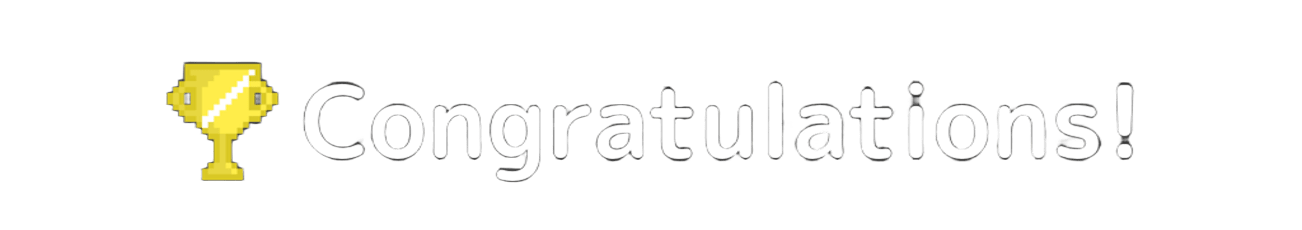